In [174]:
#we import what we need to create the predictive model

import pandas as pd
import numpy as np
import seaborn as sb
import warnings
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

### features preprocessing

In [175]:
#we create the dataframe containing the dataset

data = pd.read_csv('student-por.csv', sep=';')

In [176]:
# we print it to understand it better
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [177]:
# we preprocess the data, we perform onehot encoding on every categorical variable using pd.get_dummies


data_onehot = data.copy()


#The function pd.get_dummies is a useful tool to perform one hot encoding on categorical variables. Indeed,
#for each categorical variable, the function counts the number of categorical variables (let it be n) of the
#column and create n new columns and delete the old column. In addition, for each row, there will be just one
# of the n new columns filled with 1 (the one corresponding to the categorical value present in the old column)
#while the other ones will filled with 0. In such a way we can encode a categorical feature with numbers.

data_onehot = pd.get_dummies(data_onehot, columns=['school'], prefix = ['school'])
data_onehot = pd.get_dummies(data_onehot, columns=['sex'], prefix = ['sex'])
data_onehot = pd.get_dummies(data_onehot, columns=['address'], prefix = ['address'])
data_onehot = pd.get_dummies(data_onehot, columns=['famsize'], prefix = ['famsize'])
data_onehot = pd.get_dummies(data_onehot, columns=['Pstatus'], prefix = ['Pstatus'])
data_onehot = pd.get_dummies(data_onehot, columns=['Mjob'], prefix = ['Mjob'])
data_onehot = pd.get_dummies(data_onehot, columns=['Fjob'], prefix = ['Fjob'])
data_onehot = pd.get_dummies(data_onehot, columns=['reason'], prefix = ['reason'])
data_onehot = pd.get_dummies(data_onehot, columns=['guardian'], prefix = ['guardian'])
data_onehot = pd.get_dummies(data_onehot, columns=['schoolsup'], prefix = ['schoolsup'])
data_onehot = pd.get_dummies(data_onehot, columns=['famsup'], prefix = ['famsup'])
data_onehot = pd.get_dummies(data_onehot, columns=['paid'], prefix = ['paid'])
data_onehot = pd.get_dummies(data_onehot, columns=['activities'], prefix = ['activities'])
data_onehot = pd.get_dummies(data_onehot, columns=['nursery'], prefix = ['nursery'])
data_onehot = pd.get_dummies(data_onehot, columns=['higher'], prefix = ['higher'])
data_onehot = pd.get_dummies(data_onehot, columns=['internet'], prefix = ['internet'])
data_onehot = pd.get_dummies(data_onehot, columns=['romantic'], prefix = ['romantic'])
data_onehot.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


Notice that the number of columns of our dataset has increased due to the onehot encoding preprocessing.

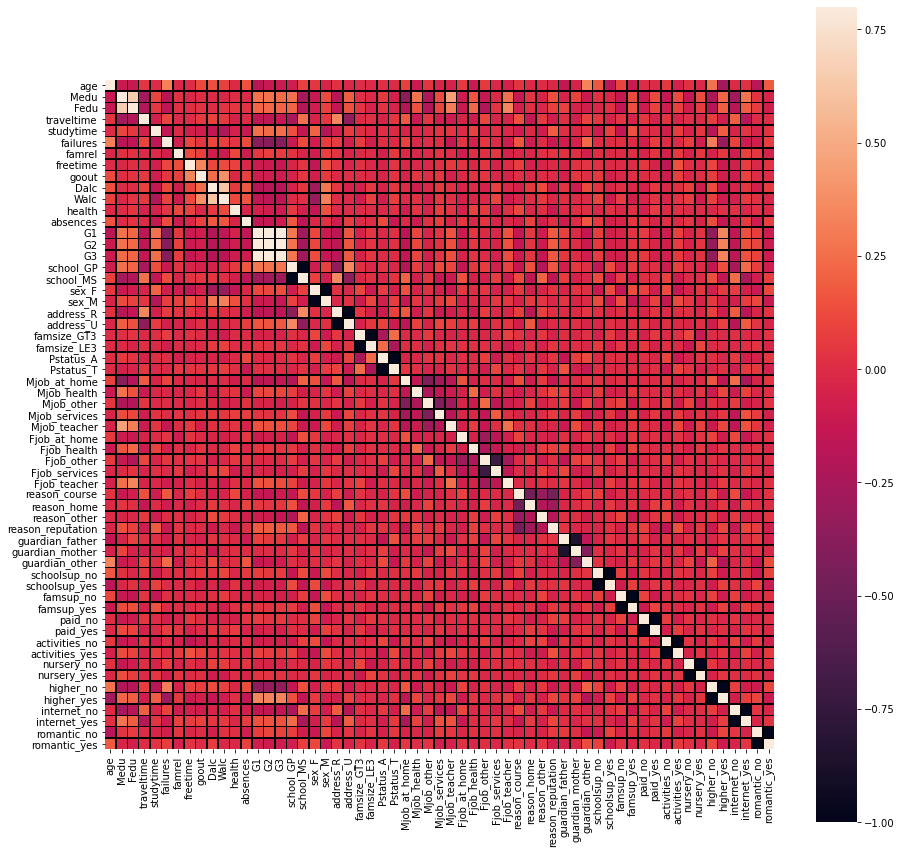

In [178]:
# we look at the correlation matrix to understand variables importance

C_mat = data_onehot.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat, vmax = .8, square = True, linewidths=0.5, linecolor='black')
plt.show()

### we will now try to predict the final grade (G3 column) from the other features

In [179]:
#we produce the inputs and outputs from the dataset
#for the moment we consider the final grade (G3) as the output and every other variable as input

X = data_onehot.drop('G3', axis =1) #X is the input dataframe
Y = data_onehot[['G3']] #Y is the output dataframe


In [180]:
# we split the dataset
# we do not create the validation set because we will validate directly in the neural nets with validation split
# and checkpoints method. We take the test size to be equal to 20% of the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [181]:
# standardization of dependent variables

scale_X = StandardScaler()


X_train_normalized = scale_X.fit_transform(X_train)

X_test_normalized = scale_X.transform(X_test)

#We tried normalizing the data but the neural net was performing worse than before

In [182]:
#We define the dense neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))
# Compile the network :

NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# we print the summary to give a look at how the neural net has been made
NN_model.summary()

# we set the checkpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 128)               7552      
_________________________________________________________________
dense_71 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_72 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_73 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_74 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_75 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_76 (Dense)             (None, 1)               

In [10]:
# we fit the model
NN_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split = 0.2,
             callbacks=callbacks_list)


Epoch 1/50
13/13 [==============================] - 4s 208ms/step - loss: 99.7558 - mse: 99.7558 - val_loss: 20.0429 - val_mse: 20.0429

Epoch 00001: val_loss improved from inf to 20.04293, saving model to Weights-001--20.04293.hdf5
Epoch 2/50
13/13 [==============================] - 0s 14ms/step - loss: 13.1313 - mse: 13.1313 - val_loss: 5.5633 - val_mse: 5.5633

Epoch 00002: val_loss improved from 20.04293 to 5.56333, saving model to Weights-002--5.56333.hdf5
Epoch 3/50
13/13 [==============================] - 0s 14ms/step - loss: 5.6127 - mse: 5.6127 - val_loss: 2.6924 - val_mse: 2.6924

Epoch 00003: val_loss improved from 5.56333 to 2.69245, saving model to Weights-003--2.69245.hdf5
Epoch 4/50
13/13 [==============================] - 0s 11ms/step - loss: 2.6717 - mse: 2.6717 - val_loss: 1.2998 - val_mse: 1.2998

Epoch 00004: val_loss improved from 2.69245 to 1.29984, saving model to Weights-004--1.29984.hdf5
Epoch 5/50
13/13 [==============================] - 0s 15ms/step - loss: 2

In [183]:
#We select the weights corresponding to the minimum validation loss

weights_file = 'Weights-009--0.97358.hdf5'
NN_model.load_weights(weights_file)  # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#we use the model to predict
test_predictions = NN_model.predict(X_test)

In [184]:
#we transform the prediction in a list of values instead of a list of lists

test_predictions_list = []
for i in range(np.shape(test_predictions)[0]):
    test_predictions_list.append(test_predictions[i][0])
    
#This is how the prediction list looks like
print(test_predictions_list)


[-0.008132626, 10.769501, 9.103957, 6.7649493, 11.295243, 11.158021, 14.420348, 12.965419, 15.395588, 14.216543, 9.509381, 10.798364, 12.417984, 12.805558, 15.8537, 12.470553, 9.479701, 9.224326, 13.318134, 11.477759, 15.375223, -0.0011010589, 9.534612, 9.884938, 11.148833, 8.368514, 11.951442, 12.905649, 13.612807, 10.5177145, 9.437321, 12.586984, 10.700213, 6.125667, 9.81755, 11.704921, 13.157812, 15.291917, 17.928473, 15.54268, 15.884067, 11.624383, 13.570221, 13.389871, 11.880904, 17.281488, 13.761896, 18.178835, 10.324434, 14.342559, 10.032187, 17.71666, 11.860639, 15.419315, 17.079952, 11.343345, 8.461631, 11.304202, 13.503419, 14.248313, 10.135355, 8.845652, 15.40579, 9.716962, 17.08068, 12.411492, 14.983444, 17.813107, 9.556801, 14.869839, 12.328906, 16.507483, 9.771953, 11.366342, 8.253354, 13.978732, 16.26704, 9.565558, 11.546861, 10.586122, 11.502503, 12.191448, 12.917815, 16.852703, 7.9967494, 15.745239, 12.291226, 12.843976, 11.391076, 15.772138, 16.791405, 12.722652, 9.79

In [185]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in test_predictions_list] #python comprehension

In [186]:
#We compute the MSE in order to understand how good is the fit
print('the mean squared error with respect to the test set is', mean_squared_error(Y_test, pred))

the mean squared error with respect to the test set is 1.9384615384615385


In [187]:
#we create a dataframe to visualize the predictions
#The dataframe has two columns, one of them with the ground-truth grades and the other with the predicted grades

final_results = pd.DataFrame(data = {'true_grades': Y_test['G3'].to_list(), 'predicted_grades': pred})

### Visualization of the results

In [188]:
#we print the results for visualization

final_results.head(10)

,true_grades,predicted_grades
0,0,0
1,11,11
2,8,9
3,8,7
4,11,11
5,11,11
6,15,14
7,13,13
8,16,15
9,14,14


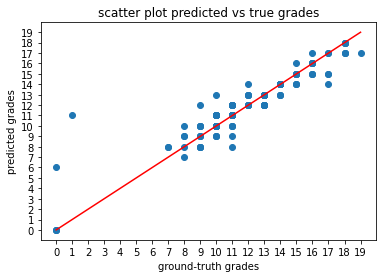

In [189]:
#we expect the points to lie close to the y=x line
x = range(20)
y = x
plt.scatter(Y_test['G3'].to_list(), pred) # we scatter plot the points
plt.plot(x,y, 'r') #we plot the line
plt.xlabel('ground-truth grades')
plt.ylabel('predicted grades')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1,1.0))
plt.title('scatter plot predicted vs true grades')
plt.show()

As expected the points lie close to the line y=x which shows that the predictions are quite accurate, a part from some noise.

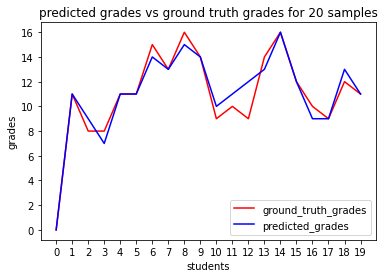

In [190]:
#we use the line plot to visualize the difference between the predicted and the ground truth final grades for the
#first 20 students

plt.plot(Y_test['G3'].to_list()[0:20], 'r', label = 'ground_truth_grades')
plt.plot(pred[0:20], 'b', label = 'predicted_grades')
plt.legend()
plt.title('predicted grades vs ground truth grades for 20 samples')
plt.xlabel('students')
plt.ylabel('grades')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

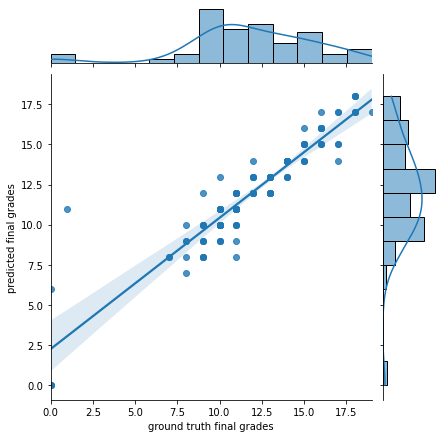

In [191]:
h = sb.jointplot(x = Y_test['G3'].to_list(), y =pred, kind = 'reg' )
h.set_axis_labels('ground truth final grades', 'predicted final grades', fontsize=10)

In [192]:
from scipy.stats import kstest

kstest(Y_test['G3'].to_list(), pred)

KstestResult(statistic=0.06153846153846154, pvalue=0.9674066920090229)

I accept the null hp

kolmogorov smirnov test

### We will now try using a different approach: we will use a regression model based on Support Vector Machine to compare the two techniques

In [193]:

# we set some of the possible values of the parameters which we will use to fit the models
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,5,7,8,9],'coef0' : [0.01,1,5],'gamma' : ('auto','scale')},

#we define the model
modelsvr = SVR()

#we perform a grid search to find the best parameters in the param dictionary created before 
clf = GridSearchCV(estimator= modelsvr, param_grid=param, verbose=2, n_jobs=-1)

#we fit the model with the best parameters
clf.fit( X_train, Y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\Luca\anaconda3\envs\introml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid=({'C': [1, 5, 10], 'coef0': [0.01, 1, 5],
                          'degree': [3, 5, 7, 8, 9], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},),
             verbose=2)

In [194]:
print(clf.best_estimator_) #we print the best parameters found with gridsearch
Y_pred = clf.predict(X_test) #we predict now the labels

SVR(C=5, coef0=1, kernel='poly')


In [195]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in Y_pred] #python comprehension

In [196]:
#We compute the MSE
print('the mean squared error with respect to the test set is', mean_squared_error(Y_test, pred))

the mean squared error with respect to the test set is 2.1076923076923078


In [197]:
#we create a dataframe to visualize the predictions
#The dataframe has two columns, one of them with the ground-truth grades and the other with the predicted grades

final_results = pd.DataFrame(data = {'true_grades': Y_test['G3'].to_list(), 'predicted_grades': pred})

### Visualization of the results

In [198]:
#we print the results for visualization

final_results.head(10)

,true_grades,predicted_grades
0,0,2
1,11,10
2,8,9
3,8,7
4,11,11
5,11,11
6,15,14
7,13,13
8,16,15
9,14,14


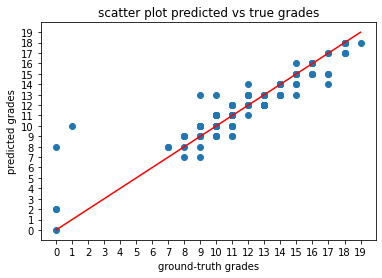

In [199]:
#we expect the points to lie close to the y=x line
x = range(20)
y = x
plt.scatter(Y_test['G3'].to_list(), pred) # we scatter plot the points
plt.plot(x,y, 'r') #we plot the line
plt.xlabel('ground-truth grades')
plt.ylabel('predicted grades')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), max(y)+1, 1.0))
plt.title('scatter plot predicted vs true grades')
plt.show()

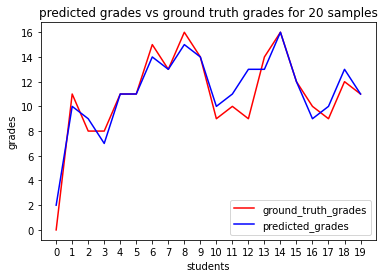

In [200]:
plt.plot(Y_test['G3'].to_list()[0:20], 'r', label = 'ground_truth_grades')
plt.plot(pred[0:20], 'b', label = 'predicted_grades')
plt.legend()
plt.title('predicted grades vs ground truth grades for 20 samples')
plt.xlabel('students')
plt.ylabel('grades')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

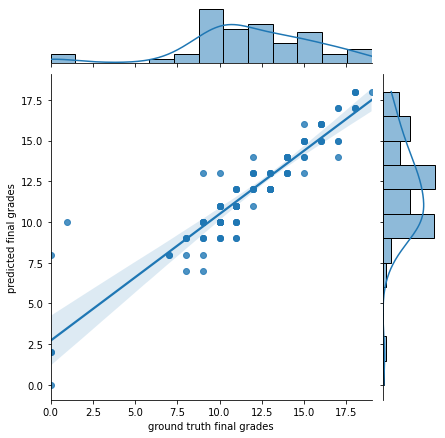

In [201]:
h = sb.jointplot(x = Y_test['G3'].to_list(), y =pred, kind = 'reg' )
h.set_axis_labels('ground truth final grades', 'predicted final grades', fontsize=10)

In [202]:
kstest(Y_test['G3'].to_list(), pred)

KstestResult(statistic=0.038461538461538464, pvalue=0.9999825550858977)

### Now we try to predict the final grade G3 without any knowledge regarding the grades in the two semesters G1 and G2

In [203]:
#we produce the inputs and outputs from the dataset
#we consider the final grade (G3) as the output and every other variable as input except for G1 and G2

Y = data_onehot[['G3']] #Y is the output dataframe
X = data_onehot.drop(['G3', 'G2', 'G1'], axis =1) #X is the input dataframe


In [204]:
# we split the dataset
# we do not create the validation set because we will validate directly in the neural nets with validation split
# and checkpoints method

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [205]:
# standardization of dependent variables

scale = StandardScaler()

X_train_normalized = scale.fit_transform(X_train)

In [206]:
#We define the dense neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))
# Compile the network :

NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# we print the summary to give a look at how the neural net has been made
NN_model.summary()

# we set the checkpoint
checkpoint_name = 'model 2, Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               7296      
_________________________________________________________________
dense_78 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_79 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_80 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_81 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_82 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_83 (Dense)             (None, 1)               

In [34]:
# we fit the model
NN_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split = 0.2,
             callbacks=callbacks_list)


Epoch 1/50
13/13 [==============================] - 2s 41ms/step - loss: 90.6856 - mse: 90.6856 - val_loss: 31.2886 - val_mse: 31.2886

Epoch 00001: val_loss improved from inf to 31.28863, saving model to model 2, Weights-001--31.28863.hdf5
Epoch 2/50
13/13 [==============================] - 0s 15ms/step - loss: 22.7269 - mse: 22.7269 - val_loss: 12.8253 - val_mse: 12.8253

Epoch 00002: val_loss improved from 31.28863 to 12.82526, saving model to model 2, Weights-002--12.82526.hdf5
Epoch 3/50
13/13 [==============================] - 0s 14ms/step - loss: 12.9469 - mse: 12.9469 - val_loss: 10.6868 - val_mse: 10.6868

Epoch 00003: val_loss improved from 12.82526 to 10.68682, saving model to model 2, Weights-003--10.68682.hdf5
Epoch 4/50
13/13 [==============================] - 0s 16ms/step - loss: 10.2964 - mse: 10.2964 - val_loss: 8.4667 - val_mse: 8.4667

Epoch 00004: val_loss improved from 10.68682 to 8.46668, saving model to model 2, Weights-004--8.46668.hdf5
Epoch 5/50
13/13 [=======

In [207]:
#We select the weights corresponding to the minimum validation loss

weights_file = 'model 2, Weights-013--5.13605.hdf5'
NN_model.load_weights(weights_file)  # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])

#we use the model to predict
test_predictions = NN_model.predict(X_test)


In [208]:
#we transform the prediction in a list of values instead of a list of lists

test_predictions_list = []
for i in range(np.shape(test_predictions)[0]):
    test_predictions_list.append(test_predictions[i][0])
    
#This is how the prediction list looks
print(test_predictions_list)

[10.153039, 12.275418, 9.757816, 16.16586, 10.667441, 8.502038, 13.58237, 14.665786, 13.370248, 12.839767, 11.145146, 13.318118, 11.699226, 11.341332, 13.134812, 11.621352, 9.711625, 10.515374, 15.871193, 13.28657, 13.133006, 8.255883, 7.7953095, 13.304267, 11.137943, 9.796479, 14.390256, 12.33959, 14.49968, 10.104995, 10.762557, 13.172906, 11.495158, 12.9073, 10.009179, 10.055566, 13.097898, 15.819442, 15.876379, 12.830756, 11.497985, 12.649817, 11.853321, 11.628479, 12.90487, 15.320912, 8.78629, 13.391576, 11.677634, 12.19803, 11.198201, 13.310605, 13.452356, 12.464806, 11.237939, 13.070407, 10.430041, 12.404044, 13.660062, 14.3991, 9.685937, 9.512605, 12.538767, 7.944919, 13.934913, 12.344649, 15.195923, 13.897214, 10.297854, 12.4549055, 14.17318, 13.580632, 13.107865, 11.676568, 13.468492, 14.1024885, 13.916837, 10.136315, 13.15324, 11.791539, 14.6433935, 13.381531, 12.620794, 13.185465, 7.563558, 15.282142, 15.792429, 12.151291, 14.495751, 12.378934, 14.25941, 11.971202, 11.563704

In [209]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in test_predictions_list] #python comprehension

In [210]:
#We compute the MSE
print('the mean squared error with respect to the test set is', mean_squared_error(Y_test, pred))

the mean squared error with respect to the test set is 11.015384615384615


In [211]:
#we create a dataframe to visualize the predictions
#The dataframe has two columns, one of them with the ground-truth grades and the other with the predicted grades

final_results = pd.DataFrame(data = {'true_grades': Y_test['G3'].to_list(), 'predicted_grades': pred})

### Visualization of the results

In [212]:
#we print the results for visualization

final_results.head(10)

,true_grades,predicted_grades
0,0,10
1,11,12
2,8,10
3,8,16
4,11,11
5,11,9
6,15,14
7,13,15
8,16,13
9,14,13


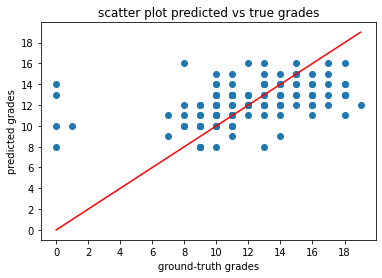

In [213]:
#we expect the points to lie the y=x line
x = range(20)
y = x
plt.scatter(Y_test['G3'].to_list(), pred)
plt.plot(x,y, 'r')
plt.xlabel('ground-truth grades')
plt.ylabel('predicted grades')
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(min(y), max(y)+1, 2.0))
plt.title('scatter plot predicted vs true grades')
plt.show()

As we can see here the model does not predict well the final grade. Indeed, even if the data points are all around the y = x line, they are not so close to the line

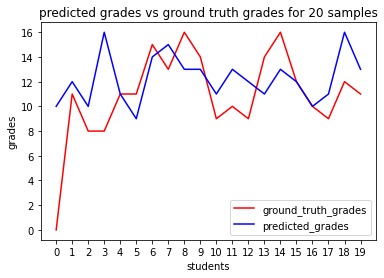

In [214]:
plt.plot(Y_test['G3'].to_list()[0:20], 'r', label = 'ground_truth_grades')
plt.plot(pred[0:20], 'b', label = 'predicted_grades')
plt.legend()
plt.title('predicted grades vs ground truth grades for 20 samples')
plt.xlabel('students')
plt.ylabel('grades')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

This plot confirms our ideas. As we can see some of the predicted grades are quite far from the ground truth grades.

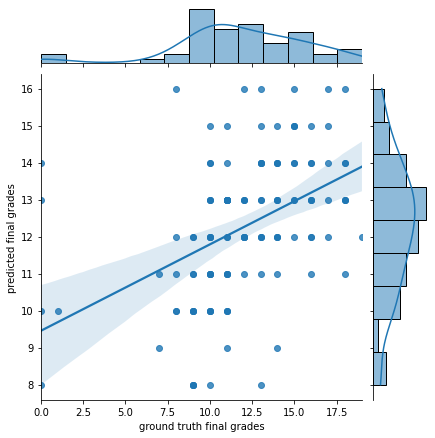

In [215]:
h = sb.jointplot(x = Y_test['G3'].to_list(), y =pred, kind = 'reg' )
h.set_axis_labels('ground truth final grades', 'predicted final grades', fontsize=10)

In [216]:
kstest(Y_test['G3'].to_list(), pred)

KstestResult(statistic=0.16153846153846155, pvalue=0.06714401792838035)

### Now we use the dataset without outliers

We try again to predict the final grade (G3) using every other feature. We use the best found model (neural network) on the dataset without outliers and we hope to find a final MSE smaller than the one found with the dataset with outliers.

In [217]:
data = pd.read_csv('data_wo_outliers.csv', sep=',')

In [218]:
# we print it to understand it better
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,res
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,-0.992165
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,0.596167
2,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,0.281186
3,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,-0.185146
4,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,-0.216970
5,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,-0.042324
6,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,-0.427364
7,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,-0.163461
8,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,1,2,2,2,14,14,14,0.150365
9,GP,F,15,U,GT3,T,2,1,services,other,...,2,2,1,1,4,0,10,12,13,-0.632409


In [219]:
# we preprocess the data, we perform onehot encoding on every categorical variable using pd.get_dummies


data_onehot = data.copy()


#The function pd.get_dummies is a useful tool to perform one hot encoding on categorical variables. Indeed,
#for each categorical variable, the function counts the number of categorical variables (let it be n) of the
#column and create n new columns and delete the old column. In addition, for each row, there will be just one
# of the n new columns filled with 1 (the one corresponding to the categorical value present in the old column)
#while the other ones will filled with 0. In such a way we can encode a categorical feature with numbers.

data_onehot = pd.get_dummies(data_onehot, columns=['school'], prefix = ['school'])
data_onehot = pd.get_dummies(data_onehot, columns=['sex'], prefix = ['sex'])
data_onehot = pd.get_dummies(data_onehot, columns=['address'], prefix = ['address'])
data_onehot = pd.get_dummies(data_onehot, columns=['famsize'], prefix = ['famsize'])
data_onehot = pd.get_dummies(data_onehot, columns=['Pstatus'], prefix = ['Pstatus'])
data_onehot = pd.get_dummies(data_onehot, columns=['Mjob'], prefix = ['Mjob'])
data_onehot = pd.get_dummies(data_onehot, columns=['Fjob'], prefix = ['Fjob'])
data_onehot = pd.get_dummies(data_onehot, columns=['reason'], prefix = ['reason'])
data_onehot = pd.get_dummies(data_onehot, columns=['guardian'], prefix = ['guardian'])
data_onehot = pd.get_dummies(data_onehot, columns=['schoolsup'], prefix = ['schoolsup'])
data_onehot = pd.get_dummies(data_onehot, columns=['famsup'], prefix = ['famsup'])
data_onehot = pd.get_dummies(data_onehot, columns=['paid'], prefix = ['paid'])
data_onehot = pd.get_dummies(data_onehot, columns=['activities'], prefix = ['activities'])
data_onehot = pd.get_dummies(data_onehot, columns=['nursery'], prefix = ['nursery'])
data_onehot = pd.get_dummies(data_onehot, columns=['higher'], prefix = ['higher'])
data_onehot = pd.get_dummies(data_onehot, columns=['internet'], prefix = ['internet'])
data_onehot = pd.get_dummies(data_onehot, columns=['romantic'], prefix = ['romantic'])
data_onehot.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
1,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
2,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
3,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
4,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
5,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
6,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
7,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0
8,15,4,4,1,2,0,3,3,3,1,...,1,0,0,1,0,1,0,1,1,0
9,15,2,1,3,3,0,5,2,2,1,...,0,1,0,1,0,1,0,1,1,0


In [220]:
#we produce the inputs and outputs from the dataset
#for the moment we consider the final grade (G3) as the output and every other variable as input

X = data_onehot.drop('G3', axis =1) #X is the input dataframe
Y = data_onehot[['G3']] #Y is the output dataframe


In [221]:
# we split the dataset
# we do not create the validation set because we will validate directly in the neural nets with validation split
# and checkpoints method. We take the test size to be equal to 20% of the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [222]:
#We define the dense neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))
# Compile the network :

NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# we print the summary to give a look at how the neural net has been made
NN_model.summary()

# we set the checkpoint
checkpoint_name = 'Model_wo_outs, Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 128)               7680      
_________________________________________________________________
dense_85 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_86 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_87 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_88 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_89 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_90 (Dense)             (None, 1)               

In [224]:
# we fit the model
NN_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split = 0.2,
             callbacks=callbacks_list)

Epoch 1/50
11/11 [==============================] - 0s 13ms/step - loss: 0.0797 - mse: 0.0797 - val_loss: 0.1515 - val_mse: 0.1515

Epoch 00001: val_loss did not improve from 0.12758
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.1011 - mse: 0.1011 - val_loss: 0.1252 - val_mse: 0.1252

Epoch 00002: val_loss improved from 0.12758 to 0.12516, saving model to Model_wo_outs, Weights-002--0.12516.hdf5
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.1430 - val_mse: 0.1430

Epoch 00003: val_loss did not improve from 0.12516
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0714 - mse: 0.0714 - val_loss: 0.1254 - val_mse: 0.1254

Epoch 00004: val_loss did not improve from 0.12516
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0651 - mse: 0.0651 - val_loss: 0.1125 - val_mse: 0.1125

Epoch 00005: val_loss improved from 0.12516 to 0.11251, saving model to Model_

In [225]:
#We select the weights corresponding to the minimum validation loss

weights_file = 'Model_wo_outs, Weights-044--0.15856.hdf5'
NN_model.load_weights(weights_file)  # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#we use the model to predict
test_predictions = NN_model.predict(X_test)

In [226]:
#we transform the prediction in a list of values instead of a list of lists

test_predictions_list = []
for i in range(np.shape(test_predictions)[0]):
    test_predictions_list.append(test_predictions[i][0])
    
#This is how the prediction list looks like
print(test_predictions_list)


[12.279233, 12.367601, 12.915458, 10.820343, 8.837503, 9.69089, 15.231728, 13.520518, 10.915771, 10.215473, 16.218203, 11.032381, 12.148658, 9.466098, 15.576882, 11.121487, 13.769418, 12.304716, 10.933569, 15.177246, 13.660111, 11.357353, 14.178992, 8.957813, 9.265739, 13.951347, 13.443388, 14.666633, 12.273039, 17.050327, 11.395863, 13.54578, 11.014943, 11.247585, 10.166136, 11.510132, 9.907873, 9.6434555, 15.708649, 9.685336, 13.661092, 14.0253105, 9.590825, 10.960787, 14.199878, 11.614058, 8.301062, 13.734472, 14.199749, 12.192688, 11.7637415, 12.902067, 10.061018, 10.090139, 12.144512, 12.974836, 9.817588, 10.461016, 9.9471, 17.667683, 9.547291, 12.00329, 12.14047, 12.813, 11.335669, 14.649882, 10.112502, 11.959265, 8.104759, 9.903288, 7.516884, 14.836389, 15.111218, 11.473082, 13.701307, 11.190414, 11.169375, 8.473983, 12.722251, 10.972561, 10.400694, 16.08437, 15.276386, 11.925879, 11.938591, 8.153099, 13.692733, 11.951278, 12.145414, 11.670407, 8.534407, 13.8336, 9.916056, 13.11

In [227]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in test_predictions_list] #python comprehension

In [228]:
#We compute the MSE in order to understand how good is the fit
print('the mean squared error with respect to the test set is', mean_squared_error(Y_test, pred))

the mean squared error with respect to the test set is 0.21818181818181817


In [229]:
#we create a dataframe to visualize the predictions
#The dataframe has two columns, one of them with the ground-truth grades and the other with the predicted grades

final_results = pd.DataFrame(data = {'true_grades': Y_test['G3'].to_list(), 'predicted_grades': pred})

### Visualization of the results

In [230]:
#we print the results for visualization

final_results.head(10)

,true_grades,predicted_grades
0,12,12
1,12,12
2,13,13
3,10,11
4,9,9
5,10,10
6,15,15
7,13,14
8,11,11
9,11,10


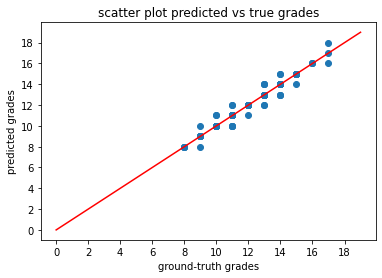

In [231]:
#we expect the points to lie close to the y=x line
x = range(20)
y = x
plt.scatter(Y_test['G3'].to_list(), pred) # we scatter plot the points
plt.plot(x,y, 'r') #we plot the line
plt.xlabel('ground-truth grades')
plt.ylabel('predicted grades')
plt.title('scatter plot predicted vs true grades')
plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.yticks(np.arange(min(y), max(y)+1, 2.0))
plt.show()

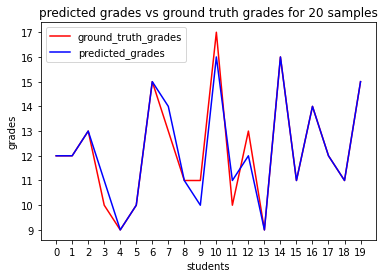

In [232]:
#we use the line plot to visualize the difference between the predicted and the ground truth final grades for the
#first 20 students

plt.plot(Y_test['G3'].to_list()[0:20], 'r', label = 'ground_truth_grades')
plt.plot(pred[0:20], 'b', label = 'predicted_grades')
plt.legend()
plt.title('predicted grades vs ground truth grades for 20 samples')
plt.xlabel('students')
plt.ylabel('grades')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

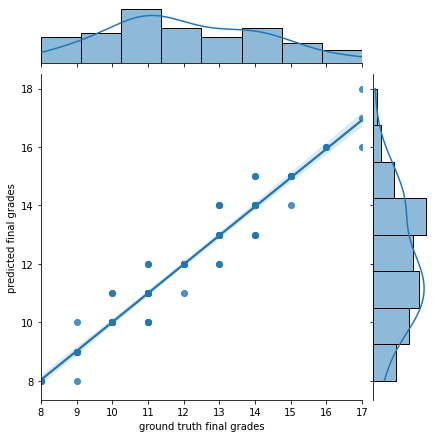

In [233]:
h = sb.jointplot(x = Y_test['G3'].to_list(), y =pred, kind = 'reg' )
h.set_axis_labels('ground truth final grades', 'predicted final grades', fontsize=10)

In [234]:
kstest(Y_test['G3'].to_list(), pred)

KstestResult(statistic=0.01818181818181818, pvalue=0.9999999999999999)

### We will now try to predict the study time from the other features of the dataset

In [235]:
#we produce the inputs and outputs from the dataset
#for the moment we consider the final grade (G3) as the output and every other variable as input

X = data_onehot.drop('studytime', axis =1) #X is the input dataframe
Y = data_onehot[['studytime']] #Y is the output dataframe


In [236]:
# we split the dataset
# we do not create the validation set because we will validate directly in the neural nets with validation split
# and checkpoints method

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [237]:
#We define the dense neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(512, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))
# Compile the network :

NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# we print the summary to give a look at how the neural net has been made
NN_model.summary()

# we set the checkpoint
checkpoint_name = 'Model 3,Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 128)               7680      
_________________________________________________________________
dense_92 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_93 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_94 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_95 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_96 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_97 (Dense)             (None, 1)               

In [63]:
# we fit the model
NN_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split = 0.2,
             callbacks=callbacks_list)

Epoch 1/50
11/11 [==============================] - 2s 69ms/step - loss: 2.2314 - mse: 2.2314 - val_loss: 0.7962 - val_mse: 0.7962

Epoch 00001: val_loss improved from inf to 0.79621, saving model to Model 3,Weights-001--0.79621.hdf5
Epoch 2/50
11/11 [==============================] - 0s 13ms/step - loss: 0.8531 - mse: 0.8531 - val_loss: 0.8756 - val_mse: 0.8756

Epoch 00002: val_loss did not improve from 0.79621
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.7213 - mse: 0.7213 - val_loss: 1.0621 - val_mse: 1.0621

Epoch 00003: val_loss did not improve from 0.79621
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.6634 - mse: 0.6634 - val_loss: 0.7847 - val_mse: 0.7847

Epoch 00004: val_loss improved from 0.79621 to 0.78469, saving model to Model 3,Weights-004--0.78469.hdf5
Epoch 5/50
11/11 [==============================] - 0s 15ms/step - loss: 0.6564 - mse: 0.6564 - val_loss: 0.7658 - val_mse: 0.7658

Epoch 00005: val_loss improved

In [238]:
#We select the weights corresponding to the minimum validation loss

weights_file = 'Model 3,Weights-015--0.70898.hdf5'
NN_model.load_weights(weights_file)  # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=['mse'])
#we use the model to predict
test_predictions = NN_model.predict(X_test)

In [239]:
#we transform the prediction in a list of values instead of a list of lists

test_predictions_list = []
for i in range(np.shape(test_predictions)[0]):
    test_predictions_list.append(test_predictions[i][0])
    
#This is how the prediction list looks
print(test_predictions_list)


[2.1051674, 2.3226647, 1.8154647, 2.6078632, 1.3091042, 1.6700852, 2.5710611, 2.3563242, 1.8838744, 1.8654885, 2.6486611, 1.7339938, 2.0384445, 1.9275286, 2.157961, 2.0476098, 1.9217954, 2.308111, 2.0681405, 2.2380989, 2.1394749, 1.4758588, 2.1175687, 1.5362523, 1.4847025, 2.1375256, 2.1697927, 2.2062864, 2.4048886, 2.6310048, 1.9694405, 2.5778675, 1.2737429, 2.6364572, 1.5283649, 1.6228914, 2.0328526, 1.494679, 2.1873038, 1.458175, 2.0652027, 2.1047857, 1.8711491, 1.9764485, 2.2682872, 1.6959469, 1.9848413, 2.490377, 1.8897979, 2.2394814, 2.0002248, 1.3576372, 1.8870795, 1.8100392, 2.5617976, 2.0902321, 2.241383, 2.483563, 2.1132975, 2.5899084, 1.689146, 2.212768, 2.1776006, 2.4444273, 1.6103342, 2.4979181, 1.9827106, 2.0833607, 1.8773391, 2.1353688, 1.7234124, 2.3131995, 1.887115, 1.7635497, 2.095627, 2.2503722, 2.2419178, 1.2615091, 1.8897405, 2.2995381, 2.3460655, 2.2281914, 2.9095607, 1.9555789, 2.6305695, 1.281976, 2.2679744, 1.7257211, 2.280566, 1.9203137, 1.3632957, 2.4697242, 

In [240]:
#we round each value of the list because the study time is an integer from 1 to 4

pred = [round(el) for el in test_predictions_list] #python comprehension

In [241]:
#we create a dataframe to visualize the predictions
#The dataframe has two columns, one of them with the ground-truth study time and the other
#with the predicted study time

final_results = pd.DataFrame(data = {'true study time': Y_test['studytime'].to_list(), 'predicted study time': pred})

In [242]:
#We compute the MSE
print('the mean squared error with respect to the test set is', mean_squared_error(Y_test, pred))

the mean squared error with respect to the test set is 0.5636363636363636


### Visualization of the results

In [243]:
final_results.head(10)

,true study time,predicted study time
0,2,2
1,2,2
2,1,2
3,3,3
4,1,1
5,1,2
6,2,3
7,2,2
8,1,2
9,4,2


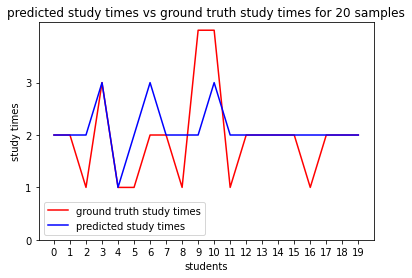

In [244]:
#we compare the ground truth study times and the predicted study times

plt.plot(Y_test['studytime'].to_list()[0:20], 'r', label = 'ground truth study times')
plt.plot(pred[0:20], 'b', label = 'predicted study times')
plt.legend()
plt.title('predicted study times vs ground truth study times for 20 samples')
plt.xlabel('students')
plt.ylabel('study times')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(min(y), 4, 1.0))
plt.show()

In [245]:
kstest(Y_test['studytime'].to_list(), pred)

KstestResult(statistic=0.23636363636363636, pvalue=0.004160196192340254)

### Let us try some binary classification, we will try to predict if the students are in a romantic relationship based on the other features

In [71]:
#we create the dataframe containing the dataset

data = pd.read_csv('student-por.csv', sep=';')

In [72]:
# we print it to understand it better
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [73]:
# we preprocess the data, we perform onehot encoding on every categorical variable using pd.get_dummies


data_onehot = data.copy()


#The function pd.get_dummies is a useful tool to perform one hot encoding on categorical variables. Indeed,
#for each categorical variable, the function counts the number of categorical variables (let it be n) of the
#column and create n new columns and delete the old column. In addition, for each row, there will be just one
# of the n new columns filled with 1 (the one corresponding to the categorical value present in the old column)
#while the other ones will filled with 0. In such a way we can encode a categorical feature with numbers.

data_onehot = pd.get_dummies(data_onehot, columns=['school'], prefix = ['school'])
data_onehot = pd.get_dummies(data_onehot, columns=['sex'], prefix = ['sex'])
data_onehot = pd.get_dummies(data_onehot, columns=['address'], prefix = ['address'])
data_onehot = pd.get_dummies(data_onehot, columns=['famsize'], prefix = ['famsize'])
data_onehot = pd.get_dummies(data_onehot, columns=['Pstatus'], prefix = ['Pstatus'])
data_onehot = pd.get_dummies(data_onehot, columns=['Mjob'], prefix = ['Mjob'])
data_onehot = pd.get_dummies(data_onehot, columns=['Fjob'], prefix = ['Fjob'])
data_onehot = pd.get_dummies(data_onehot, columns=['reason'], prefix = ['reason'])
data_onehot = pd.get_dummies(data_onehot, columns=['guardian'], prefix = ['guardian'])
data_onehot = pd.get_dummies(data_onehot, columns=['schoolsup'], prefix = ['schoolsup'])
data_onehot = pd.get_dummies(data_onehot, columns=['famsup'], prefix = ['famsup'])
data_onehot = pd.get_dummies(data_onehot, columns=['paid'], prefix = ['paid'])
data_onehot = pd.get_dummies(data_onehot, columns=['activities'], prefix = ['activities'])
data_onehot = pd.get_dummies(data_onehot, columns=['nursery'], prefix = ['nursery'])
data_onehot = pd.get_dummies(data_onehot, columns=['higher'], prefix = ['higher'])
data_onehot = pd.get_dummies(data_onehot, columns=['internet'], prefix = ['internet'])
data_onehot = pd.get_dummies(data_onehot, columns=['romantic'], prefix = ['romantic'])
data_onehot.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


In [74]:
#we produce the inputs and outputs from the dataset

#romantic_yes will be our binary output: 1 if the student has a relationship, 0 otherwise


Y = data_onehot[['romantic_yes']] #Y is the output dataframe
X = data_onehot.drop('romantic_yes', axis =1) #X is the input dataframe
X.drop('romantic_no', axis=1, inplace = True)

In [75]:
# we split the dataset
# we do not create the validation set because we will validate directly in the neural nets with validation split
# and checkpoints method. We take the test size to be equal to 20% of the dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [76]:
#We define the dense neural network

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal', activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile the network :

NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# we print the summary to give a look at how the neural net has been made
NN_model.summary()

# we set the checkpoint
checkpoint_name = 'Romantic,Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                3712      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 86,273
Trainable params: 86,273
Non-trainable params: 0
__________________________________________________

In [77]:
# we fit the model
NN_model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split = 0.2,
             callbacks=callbacks_list)

Epoch 1/50
13/13 [==============================] - 2s 39ms/step - loss: 0.6835 - accuracy: 0.6425 - val_loss: 0.6563 - val_accuracy: 0.6346

Epoch 00001: val_loss improved from inf to 0.65627, saving model to Romantic,Weights-001--0.65627.hdf5
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6458 - accuracy: 0.6533 - val_loss: 0.6605 - val_accuracy: 0.6346

Epoch 00002: val_loss did not improve from 0.65627
Epoch 3/50
13/13 [==============================] - 0s 6ms/step - loss: 0.6664 - accuracy: 0.6198 - val_loss: 0.6590 - val_accuracy: 0.6346

Epoch 00003: val_loss did not improve from 0.65627
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.6582 - accuracy: 0.6157 - val_loss: 0.6572 - val_accuracy: 0.6346

Epoch 00004: val_loss did not improve from 0.65627
Epoch 5/50
13/13 [==============================] - 0s 10ms/step - loss: 0.6683 - accuracy: 0.6025 - val_loss: 0.6573 - val_accuracy: 0.6346

Epoch 00005: val_loss did not improve

In [78]:
#We select the weights corresponding to the minimum validation loss

weights_file = 'Romantic,Weights-022--0.63021.hdf5'
NN_model.load_weights(weights_file)  # load it
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
#we use the model to predict
test_predictions = NN_model.predict(X_test)

In [79]:
#we transform the prediction in a list of values instead of a list of lists

test_predictions_list = []
for i in range(np.shape(test_predictions)[0]):
    test_predictions_list.append(test_predictions[i][0])
    
#This is how the prediction list looks
print(test_predictions_list)


[0.17238212, 0.21039784, 0.40262082, 0.26869762, 0.20483133, 0.35585403, 0.27236527, 0.22044748, 0.11153734, 0.32779962, 0.3951387, 0.20652726, 0.85821307, 0.3952415, 0.20007, 0.21634316, 0.40736634, 0.9307573, 0.8299539, 0.17637375, 0.2098102, 0.31701285, 0.93047124, 0.1897065, 0.18897298, 0.3100413, 0.2160654, 0.19031382, 0.17372724, 0.3255806, 0.2528362, 0.12841034, 0.19396165, 0.9730687, 0.3210771, 0.2335943, 0.33804494, 0.16076249, 0.17016596, 0.160375, 0.3413607, 0.31977305, 0.13883385, 0.3013931, 0.13324672, 0.17606649, 0.33093047, 0.22407967, 0.2608902, 0.1646204, 0.6054262, 0.24862626, 0.19847932, 0.3571654, 0.20886165, 0.4936526, 0.30323446, 0.70593506, 0.30486092, 0.1754795, 0.30958062, 0.29945707, 0.20379016, 0.8750448, 0.20145851, 0.2049985, 0.34567714, 0.27132994, 0.2786461, 0.21611884, 0.21538517, 0.22012138, 0.27567583, 0.28478706, 0.3342867, 0.13291138, 0.17242771, 0.32472542, 0.9179946, 0.2421427, 0.09443763, 0.29329857, 0.4587, 0.14380094, 0.28822938, 0.13327271, 0.1

In [80]:
pred = [round(el) for el in test_predictions_list]

In [81]:
accuracy = accuracy_score(Y_test, pred)
print(accuracy)

0.6230769230769231


Very low accuracy, consider that an accuracy of 0.5 means that the model is random

In [82]:
#we create a dataframe to visualize the predictions
#The dataframe has two columns, one of them with the ground-truth grades and the other with the predicted grades

final_results = pd.DataFrame(data = {'romantic': Y_test['romantic_yes'].to_list(), 'predicted_romantic': pred})

### Visualization of the results

In [83]:
final_results.head(10)

,romantic,predicted_romantic
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


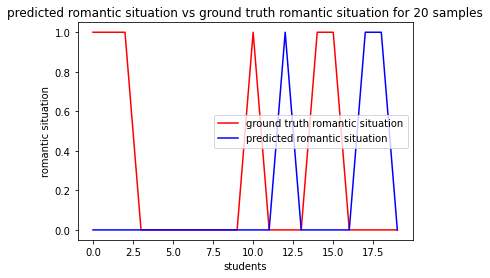

In [84]:
#we compare the ground truth romantic situation and the predicted romantic situation

plt.plot(Y_test['romantic_yes'].to_list()[0:20], 'r', label = 'ground truth romantic situation')
plt.plot(pred[0:20], 'b', label = 'predicted romantic situation')
plt.legend()
plt.title('predicted romantic situation vs ground truth romantic situation for 20 samples')
plt.xlabel('students')
plt.ylabel('romantic situation')
plt.show()

### Let us try using SVM

In [85]:

# we set some of the possible values of the parameters which we will use to fit the models
param = {'kernel' : ['poly', 'rbf', 'sigmoid'],'C' : [0.1,1,10,100,1000],'coef0' : [1,0.1,0.01,0.001,0.0001],'gamma' : ['auto','scale']},

#we define the model
modelsvc = SVC()

#we perform a grid search to find the best parameters in the param dictionary created before 
clf = GridSearchCV(estimator= modelsvc, param_grid=param, verbose=2, n_jobs=-1)

#we fit the model with the best parameters
clf.fit( X_train, Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\Luca\anaconda3\envs\introml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=({'C': [0.1, 1, 10, 100, 1000],
                          'coef0': [1, 0.1, 0.01, 0.001, 0.0001],
                          'gamma': ['auto', 'scale'],
                          'kernel': ['poly', 'rbf', 'sigmoid']},),
             verbose=2)

In [86]:
print(clf.best_estimator_) #we print the best parameters found with gridsearch
Y_pred = clf.predict(X_test) #we predict now the labels

SVC(C=1, coef0=1, kernel='poly')


In [87]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in Y_pred] #python comprehension

In [88]:
accuracy = accuracy_score(Y_test, pred)
print(accuracy)

0.6538461538461539


### We will try Logistic Regression

In [89]:

#we set the values for the grid search

penalty = [ 'l1','l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = ['balanced']
solver = ['liblinear', 'saga']
grid_values = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)
#we define the model
model_logistic = LogisticRegression()

#we perform a grid search to find the best parameters in the param dictionary created before 
clf1 = GridSearchCV(estimator= model_logistic, param_grid=grid_values, verbose=2, n_jobs=-1)

#we fit the model with the best parameters
clf1.fit( X_train, Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\Luca\anaconda3\envs\introml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [90]:
print(clf1.best_estimator_) #we print the best parameters found with gridsearch

Y_pred = clf1.predict(X_test) #we predict now the labels

LogisticRegression(C=0.0001, class_weight='balanced', penalty='l1',
                   solver='liblinear')


In [91]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in Y_pred] #python comprehension

In [92]:
accuracy = accuracy_score(Y_test, pred)
print(accuracy)

0.6538461538461539
